<a href="https://colab.research.google.com/github/Tiziri-k/SIC-exercices/blob/master/quiz/problem_0502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quiz #0502

### "Human Activity Recognition" 

#### Answer the following questions by providing Python code:
#### Objectives:
- Carry out the EDA.
- Carry out the data pre-processing.
- Optimize and test a predictive model of your choice.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [ ]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own. 

In [ ]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [ ]:
df.shape

(19622, 160)

In [ ]:
df.head(3)

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,...,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,-0.02,-21,...,-65.0,28.4,-63.9,-153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.0,-0.02,-22,...,-64.0,28.3,-63.9,-153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,-0.02,-20,...,-63.0,28.3,-63.9,-152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A


1). Carry out the EDA. Check for the missing values. HINT: The response variable is 'classe'.

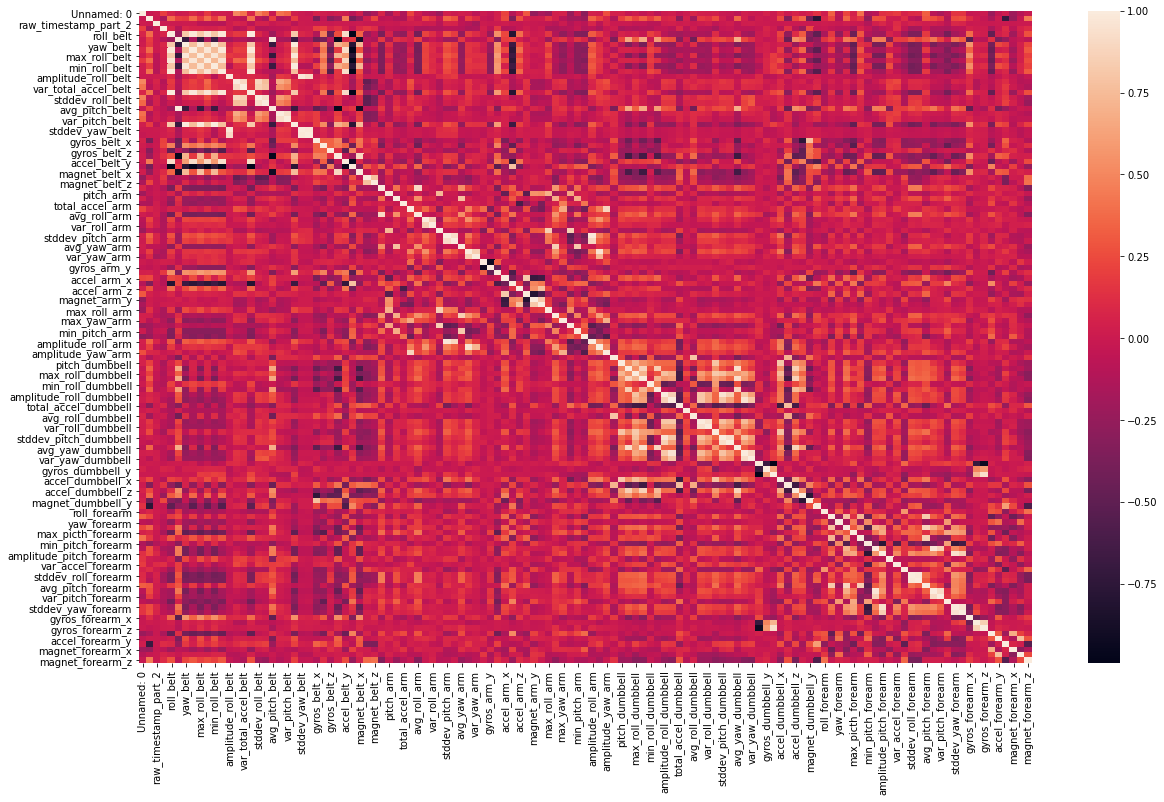

In [ ]:
fig = plt.figure(figsize=(20,12))
sns.heatmap(df.corr())

2). Get rid of the columns that have more than 97% missing values.

In [ ]:
df.isnull().sum().sum()

1921600

In [ ]:
l=list(df.columns[df.isnull().mean() > 0.97])
df= df.drop(l,axis=1)
df.shape

(19622, 60)

In [ ]:
df.head(2)

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,22,-3,599,-313,-128.0,22.5,-161.0,34,0.00,0.00,-0.02,-288,109,-123,-368,337,516,13.052175,-70.494004,-84.873939,37,0.0,-0.02,0.0,-234,47,-271,-559,293,-65.0,28.4,-63.9,-153.0,36,0.03,0.0,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,22,-7,608,-311,-128.0,22.5,-161.0,34,0.02,-0.02,-0.02,-290,110,-125,-369,337,513,13.130740,-70.637505,-84.710647,37,0.0,-0.02,0.0,-233,47,-269,-555,296,-64.0,28.3,-63.9,-153.0,36,0.02,0.0,-0.02,192,203,-216,-18,661.0,473.0,A


3). Get rid of the unnecessary columns. HINT: Those columns with "time" in the name and those that are obviously unnecessary.

In [ ]:
df = df.drop(['user_name',	'raw_timestamp_part_1',	'raw_timestamp_part_2','cvtd_timestamp','new_window'],axis=1)
df.shape

(19622, 55)

4). Label encode the responde variable. HINT: use preprocessing.LabelEncoder(). 

In [ ]:
y= df.classe
x= df.drop('classe',axis=1)

In [ ]:
import random
random.seed(1234)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [ ]:
lablel_encoder = preprocessing.LabelEncoder()
lablel_encoder.fit(y_train)
y_train = lablel_encoder.transform(y_train)
y_test = lablel_encoder.transform(y_test)

In [ ]:
y_test

array([2, 2, 4, ..., 4, 2, 2])

5). Carry out min-max scaling of the exploratory variables. HINT: use preprocessing.MinMaxScaler().

In [ ]:
scaler= preprocessing.MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

6). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s)
- Calculate the accuracy.
- Aim for upper 90% accuracy.

In [ ]:
from sklearn.model_selection import cross_val_score
l = [XGBClassifier(),KNeighborsClassifier(),DecisionTreeClassifier()]
score=[]

for i in l :
    m=cross_val_score(i,x_train,y_train, cv=5).mean()
    print('accuray mean : ',m)

accuray mean :  0.9997815799053512
accuray mean :  0.9739352020385876
accuray mean :  0.9997815799053512


In [ ]:
# we choosse decission tree algorithm 
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.9996602683879735
